# STEP 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
car_df = pd.read_csv('cars.csv')

In [4]:
brand_df = pd.read_csv('brand.csv')

In [5]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [6]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


# Cars.csv 와 brand.csv 데이터 합치기

두 시트의 title의 이름이 서로 일치하지 않음

unique를 이용해 어떠한 요소가 있는지 파악을 진행

In [7]:
car_df["title"].unique()

array(['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH',
       'HYUNDAI COUPE', 'FORD FOCUS', 'VOLVO 740', 'PEUGEOT 207',
       'FORD FIESTA', 'VAUXHALL INSIGNIA', 'BMW 3 SERIES', 'CITROEN C1',
       'CITROEN C4', 'VAUXHALL ASTRA', 'FORD MONDEO',
       'MERCEDES-BENZ A180', 'PEUGEOT 407', 'FORD KA',
       'MERCEDES-BENZ A CLASS', 'MAZDA MAZDA2', 'SAAB 9-3',
       'VOLKSWAGEN POLO', 'BMW 1 SERIES', 'HONDA ACCORD',
       'VOLKSWAGEN BEETLE', 'MG MG6', 'FORD C-MAX', 'HONDA CIVIC',
       'TOYOTA AURIS', 'VOLVO S40', 'SEAT IBIZA', 'PEUGEOT 308',
       'VAUXHALL MERIVA', 'MERCEDES-BENZ B CLASS', 'MAZDA MAZDA3',
       'NISSAN 350 Z', 'ALFA ROMEO MITO', 'RENAULT FLUENCE',
       'VOLKSWAGEN PASSAT', 'KIA SPORTAGE', 'CITROEN XM',
       'VAUXHALL ANTARA', 'NISSAN NOTE', 'BMW 5 SERIES', 'HONDA CR-V',
       'PROTON SAVVY', 'NISSAN MICRA', 'FIAT PANDA', 'RENAULT MEGANE',
       'RENAULT CLIO', 'HYUNDAI I20', 'CITROEN C3', 'AUDI A6 SALOON',
       'TOYOTA YARIS', 'FIAT 500', 

car_df title은 차량 모델 앞에 브랜드 명이 무조건 붙어 있는 것을 확인하였음.

In [8]:
car_title = car_df["title"].unique()

In [9]:
car_df[['title', 'model']] = car_df["title"].str.split(" ", 1, expand=True)

car_title에서 첫번째 공백을 기준으로 단어를 나눠서 title과 model 컬럼을 생성

In [10]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,FABIA
1,VAUXHALL,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,CORSA
2,HYUNDAI,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,I30
3,MINI,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,HATCH
4,VAUXHALL,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,CORSA


In [11]:
brand_df['title'] = brand_df['title'].str.upper()

brand_df에 있는 title 컬럼을 대문자로 변경

In [12]:
brand_df['title']

0             SKODA
1          VAUXHALL
2           HYUNDAI
3              MINI
4              FORD
5             VOLVO
6           PEUGEOT
7               BMW
8           CITROEN
9     MERCEDES-BENZ
10            MAZDA
11             SAAB
12       VOLKSWAGEN
13            HONDA
14               MG
15           TOYOTA
16             SEAT
17           NISSAN
18             ALFA
19          RENAULT
20              KIA
21           PROTON
22             FIAT
23             AUDI
24       MITSUBISHI
25            LEXUS
26             LAND
27        CHEVROLET
28           SUZUKI
29            DACIA
30         DAIHATSU
31             JEEP
32           JAGUAR
33         CHRYSLER
34            ROVER
35               DS
36           DAEWOO
37            DODGE
38          PORSCHE
39           SUBARU
40         INFINITI
41           ABARTH
42            SMART
43           MARCOS
44         MASERATI
45        SSANGYONG
46          LAGONDA
47            ISUZU
Name: title, dtype: object

In [13]:
car_df = car_df.merge(brand_df, on = 'title')

car_df 와 brand_df 데이터 합치기

In [14]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,FABIA,Czech Republic
1,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,FABIA,Czech Republic
2,SKODA,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,FABIA,Czech Republic
3,SKODA,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,FABIA,Czech Republic
4,SKODA,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,FABIA,Czech Republic


# 결측치 처리하기

In [15]:
car_df.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
model                   0
country                 0
dtype: int64

In [16]:
car_df['Previous Owners'].value_counts()

2.0    594
1.0    523
3.0    475
4.0    360
5.0    208
6.0     60
7.0     39
8.0     12
9.0      5
Name: Previous Owners, dtype: int64

In [17]:
car_df['Previous Owners'] = car_df['Previous Owners'].fillna(0)
car_df['Previous Owners'] = car_df['Previous Owners'].astype(int)

In [18]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
0,SKODA,6900,70189,2016,3,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,FABIA,Czech Republic
1,SKODA,6900,70189,2016,3,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,FABIA,Czech Republic
2,SKODA,1990,150000,2007,2,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,FABIA,Czech Republic
3,SKODA,1995,84000,2008,0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN,FABIA,Czech Republic
4,SKODA,2495,124138,2011,3,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN,FABIA,Czech Republic


Previous Owners가 NAN인 경우는 이전 주인이 없다는 뜻 인것으로 판단하고 0으로 변경하고 정수로 변경

In [19]:
car_df.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners         0
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
model                   0
country                 0
dtype: int64

In [20]:
car_df["Service history"] = car_df["Service history"].fillna("Unknown")

In [21]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
0,SKODA,6900,70189,2016,3,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,FABIA,Czech Republic
1,SKODA,6900,70189,2016,3,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,FABIA,Czech Republic
2,SKODA,1990,150000,2007,2,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,FABIA,Czech Republic
3,SKODA,1995,84000,2008,0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,Unknown,FABIA,Czech Republic
4,SKODA,2495,124138,2011,3,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,Unknown,FABIA,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MASERATI,10000,72000,2009,3,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,QUATTROPORTE,Italy
3683,SSANGYONG,12995,42771,2018,2,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,Unknown,KORANDO,South Korea
3684,SSANGYONG,4277,82400,2013,0,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 5,Full,KORANDO,South Korea
3685,LAGONDA,14995,84000,1953,0,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,Unknown,LG6 ROADSTER,United Kingdom


Service history에 있는 NAN 값을 Unknown으로 변경

In [22]:
car_df.isna().sum()

title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine               45
Gearbox               0
Doors                25
Seats                35
Emission Class       87
Service history       0
model                 0
country               0
dtype: int64

In [23]:
car_df = car_df.dropna()

car_df에 있는 NAN값을 포함한 나머지 행들을 제거

In [24]:
car_df.isna().sum()

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
model                0
country              0
dtype: int64

In [25]:
car_df = car_df.drop_duplicates()
car_df = car_df.reset_index(drop=True)

중복 데이터 제거 후 index 정렬

In [26]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
0,SKODA,6900,70189,2016,3,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,FABIA,Czech Republic
1,SKODA,1990,150000,2007,2,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,FABIA,Czech Republic
2,SKODA,1995,84000,2008,0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,Unknown,FABIA,Czech Republic
3,SKODA,2495,124138,2011,3,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,Unknown,FABIA,Czech Republic
4,SKODA,2490,56000,2003,0,Petrol,Hatchback,1.8L,Automatic,5.0,5.0,Euro 4,Unknown,OCTAVIA,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,MASERATI,16000,66000,2008,0,Petrol,Coupe,4.2L,Automatic,2.0,4.0,Euro 4,Full,GRANTURISMO,Italy
2789,MASERATI,13900,63000,2014,5,Diesel,Saloon,3.0L,Automatic,4.0,5.0,Euro 5,Unknown,GHIBLI,Italy
2790,MASERATI,10000,72000,2009,3,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full,QUATTROPORTE,Italy
2791,SSANGYONG,12995,42771,2018,2,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,Unknown,KORANDO,South Korea


# 카테고리형 변수를 숫자 형태로 변환하기

In [27]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2793 non-null   object 
 1   Price              2793 non-null   int64  
 2   Mileage(miles)     2793 non-null   int64  
 3   Registration_Year  2793 non-null   int64  
 4   Previous Owners    2793 non-null   int64  
 5   Fuel type          2793 non-null   object 
 6   Body type          2793 non-null   object 
 7   Engine             2793 non-null   object 
 8   Gearbox            2793 non-null   object 
 9   Doors              2793 non-null   float64
 10  Seats              2793 non-null   float64
 11  Emission Class     2793 non-null   object 
 12  Service history    2793 non-null   object 
 13  model              2793 non-null   object 
 14  country            2793 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 327.4+ KB


In [28]:
car_df['Engine'].unique()

array(['1.4L', '1.9L', '1.2L', '1.8L', '1.6L', '2.0L', '1.0L', '1.5L',
       '1.3L', '2.2L', '2.8L', '1.7L', '1.1L', '3.0L', '5.0L', '2.5L',
       '2.3L', '2.4L', '2.7L', '4.4L', '4.8L', '3.7L', '2.1L', '3.5L',
       '2.6L', '3.2L', '5.5L', '6.3L', '0.9L', '3.1L', '4.3L', '4.2L',
       '0.8L', '3.3L'], dtype=object)

In [29]:
car_df['Emission Class'].unique()

array(['Euro 6', 'Euro 4', 'Euro 5', 'Euro 3', 'Euro 2', 'Euro 1'],
      dtype=object)

Engine은 float Emission Class는 int로 변환이 가능함

In [30]:
car_df['Engine'] = car_df['Engine'].str.replace("L", '').astype(float)

In [31]:
car_df['Emission Class'] = car_df['Emission Class'].str.replace("Euro ", '').astype(int)

In [32]:
car_df = car_df.rename(columns={'Engine' : 'Engine(L)', 'Emission Class' : 'Emission Class(Euro)'})

In [33]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,model,country
0,SKODA,6900,70189,2016,3,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,FABIA,Czech Republic
1,SKODA,1990,150000,2007,2,Diesel,Hatchback,1.9,Manual,5.0,5.0,4,Full,FABIA,Czech Republic
2,SKODA,1995,84000,2008,0,Petrol,Hatchback,1.4,Manual,5.0,5.0,4,Unknown,FABIA,Czech Republic
3,SKODA,2495,124138,2011,3,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5,Unknown,FABIA,Czech Republic
4,SKODA,2490,56000,2003,0,Petrol,Hatchback,1.8,Automatic,5.0,5.0,4,Unknown,OCTAVIA,Czech Republic


In [34]:
car_df['Doors'].value_counts()

5.0    1784
3.0     545
4.0     301
2.0     163
Name: Doors, dtype: int64

In [35]:
car_df['Seats'].value_counts()

5.0    2263
4.0     413
7.0      88
2.0      24
6.0       3
3.0       2
Name: Seats, dtype: int64

Doors와 Seats는 실수로 존재할 수 없기 때문에 정수로 변환

In [36]:
car_df['Doors'] = car_df['Doors'].astype(int)
car_df['Seats'] = car_df['Seats'].astype(int)

In [37]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 2793 non-null   object 
 1   Price                 2793 non-null   int64  
 2   Mileage(miles)        2793 non-null   int64  
 3   Registration_Year     2793 non-null   int64  
 4   Previous Owners       2793 non-null   int64  
 5   Fuel type             2793 non-null   object 
 6   Body type             2793 non-null   object 
 7   Engine(L)             2793 non-null   float64
 8   Gearbox               2793 non-null   object 
 9   Doors                 2793 non-null   int64  
 10  Seats                 2793 non-null   int64  
 11  Emission Class(Euro)  2793 non-null   int64  
 12  Service history       2793 non-null   object 
 13  model                 2793 non-null   object 
 14  country               2793 non-null   object 
dtypes: float64(1), int64(

# 이상치 확인

<AxesSubplot:ylabel='Price'>

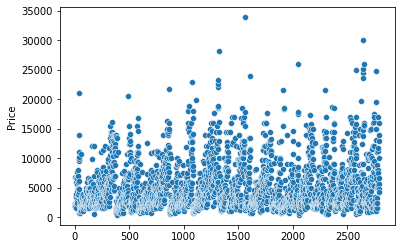

In [38]:
sns.scatterplot(x=car_df.index, y=car_df['Price'])

In [39]:
car_df[car_df['Price'] > 30000]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,model,country
1559,MERCEDES-BENZ,33900,92000,2019,1,Diesel,SUV,2.0,Automatic,5,5,6,Unknown,GLE CLASS,Germany


In [40]:
car_df['Price'].sort_values()

2051      400
383       450
175       495
870       499
2305      500
        ...  
2650    25995
2049    25995
1323    28240
2646    30000
1559    33900
Name: Price, Length: 2793, dtype: int64

가격은 이상치로 의심되는 데이터가 없음

In [42]:
car_df['Mileage(miles)'].sort_values()

1914          1
1915          1
1912          6
2049        222
1913       1048
         ...   
1486     207734
1332     208000
2477     234680
922      274100
1683    1110100
Name: Mileage(miles), Length: 2793, dtype: int64

<AxesSubplot:ylabel='Mileage(miles)'>

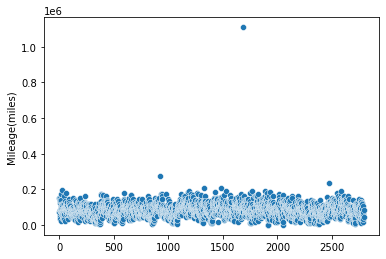

In [41]:
sns.scatterplot(x=car_df.index, y=car_df['Mileage(miles)'])

In [43]:
car_df[car_df['Mileage(miles)'] > 200000]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,model,country
922,VOLVO,795,274100,2004,6,Petrol,Estate,2.4,Automatic,5,5,3,Unknown,V70,Sweden
1332,BMW,1995,208000,2009,4,Diesel,Coupe,3.0,Automatic,2,4,4,Unknown,3 SERIES,Germany
1486,MERCEDES-BENZ,4769,207734,2012,0,Diesel,Saloon,3.0,Automatic,4,5,6,Unknown,S CLASS,Germany
1683,VOLKSWAGEN,2495,1110100,2003,4,Petrol,Hatchback,2.0,Automatic,3,4,4,Unknown,BEETLE,Germany
2477,AUDI,2600,234680,2011,1,Diesel,Estate,2.0,Manual,5,5,5,Unknown,A6 AVANT,Germany


In [44]:
car_df = car_df[car_df['Mileage(miles)'] < 300000]

In [45]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,model,country
0,SKODA,6900,70189,2016,3,Diesel,Hatchback,1.4,Manual,5,5,6,Unknown,FABIA,Czech Republic
1,SKODA,1990,150000,2007,2,Diesel,Hatchback,1.9,Manual,5,5,4,Full,FABIA,Czech Republic
2,SKODA,1995,84000,2008,0,Petrol,Hatchback,1.4,Manual,5,5,4,Unknown,FABIA,Czech Republic
3,SKODA,2495,124138,2011,3,Petrol,Hatchback,1.2,Automatic,5,5,5,Unknown,FABIA,Czech Republic
4,SKODA,2490,56000,2003,0,Petrol,Hatchback,1.8,Automatic,5,5,4,Unknown,OCTAVIA,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,MASERATI,16000,66000,2008,0,Petrol,Coupe,4.2,Automatic,2,4,4,Full,GRANTURISMO,Italy
2789,MASERATI,13900,63000,2014,5,Diesel,Saloon,3.0,Automatic,4,5,5,Unknown,GHIBLI,Italy
2790,MASERATI,10000,72000,2009,3,Petrol,Saloon,4.2,Automatic,4,5,4,Full,QUATTROPORTE,Italy
2791,SSANGYONG,12995,42771,2018,2,Diesel,SUV,2.2,Automatic,5,5,6,Unknown,KORANDO,South Korea


이상치를 훨씬 뛰어넘는 데이터 하나가 존재하므로 해당 데이터를 삭제

In [46]:
car_df['Registration_Year'].sort_values()

1766    1993
2609    1997
993     1997
2102    1997
996     1998
        ... 
1914    2023
1915    2023
2290    2023
1913    2023
2049    2023
Name: Registration_Year, Length: 2792, dtype: int64

In [47]:
car_df['Previous Owners'].sort_values()

1395    0
1398    0
1384    0
1380    0
1378    0
       ..
1140    9
1099    9
82      9
1092    9
550     9
Name: Previous Owners, Length: 2792, dtype: int64

In [48]:
car_df['Engine(L)'].sort_values()

2655    0.8
2784    0.8
2293    0.9
2298    0.9
2708    0.9
       ... 
1453    5.0
632     5.0
1494    5.0
1522    5.5
1551    6.3
Name: Engine(L), Length: 2792, dtype: float64

In [49]:
car_df['Doors'].sort_values()

958     2
1155    2
1157    2
1085    2
1894    2
       ..
1014    5
1012    5
1010    5
1030    5
2792    5
Name: Doors, Length: 2792, dtype: int64

In [50]:
car_df['Seats'].sort_values()

1605    2
1287    2
2398    2
1550    2
1604    2
       ..
2016    7
611     7
1014    7
2323    7
1798    7
Name: Seats, Length: 2792, dtype: int64

In [51]:
car_df['Emission Class(Euro)'].sort_values()

1766    1
1695    2
1900    2
2609    2
2618    2
       ..
1389    6
1390    6
1392    6
1323    6
1395    6
Name: Emission Class(Euro), Length: 2792, dtype: int64

이상치로 보이는 데이터가 더 이상 보이지 않음

# OneHotEncoding

In [52]:
car_df['Service history'].value_counts()

Unknown    2352
Full        440
Name: Service history, dtype: int64

In [53]:
car_df['Fuel type'].value_counts()

Petrol                   1779
Diesel                    993
Petrol Hybrid              14
Petrol Plug-in Hybrid       5
Diesel Hybrid               1
Name: Fuel type, dtype: int64

In [54]:
car_df['Body type'].value_counts()

Hatchback      1672
SUV             381
Saloon          297
MPV             129
Estate          118
Coupe           103
Convertible      88
Pickup            3
Combi Van         1
Name: Body type, dtype: int64

In [55]:
car_df['country'].value_counts()

Germany           677
United Kingdom    545
Japan             450
France            380
United States     346
South Korea       139
Italy             107
Czech Republic     47
Spain              46
Sweden             39
Romania            14
Malaysia            2
Name: country, dtype: int64

In [56]:
car_df['Gearbox'].value_counts()

Manual       2167
Automatic     625
Name: Gearbox, dtype: int64

In [57]:
bf_car_df = car_df.copy()

In [58]:
car_df = pd.get_dummies(car_df, columns = ['Service history', 'Fuel type', 'Body type', 'country', 'Gearbox'], drop_first = True)

In [59]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(Euro),model,...,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States,Gearbox_Manual
0,SKODA,6900,70189,2016,3,1.4,5,5,6,FABIA,...,0,0,0,0,0,0,0,0,0,1
1,SKODA,1990,150000,2007,2,1.9,5,5,4,FABIA,...,0,0,0,0,0,0,0,0,0,1
2,SKODA,1995,84000,2008,0,1.4,5,5,4,FABIA,...,0,0,0,0,0,0,0,0,0,1
3,SKODA,2495,124138,2011,3,1.2,5,5,5,FABIA,...,0,0,0,0,0,0,0,0,0,0
4,SKODA,2490,56000,2003,0,1.8,5,5,4,OCTAVIA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,MASERATI,16000,66000,2008,0,4.2,2,4,4,GRANTURISMO,...,1,0,0,0,0,0,0,0,0,0
2789,MASERATI,13900,63000,2014,5,3.0,4,5,5,GHIBLI,...,1,0,0,0,0,0,0,0,0,0
2790,MASERATI,10000,72000,2009,3,4.2,4,5,4,QUATTROPORTE,...,1,0,0,0,0,0,0,0,0,0
2791,SSANGYONG,12995,42771,2018,2,2.2,5,5,6,KORANDO,...,0,0,0,0,1,0,0,0,0,0


object 데이터 중 title과 model은 종류가 너무 많아 OneHotEncoding에서 제외하였음

# Scaling

In [60]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [61]:
num_car_df = car_df.drop(['title', 'model'], axis = 1)

In [62]:
num_car_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(Euro),Service history_Unknown,Fuel type_Diesel Hybrid,...,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States,Gearbox_Manual
0,6900,70189,2016,3,1.4,5,5,6,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1990,150000,2007,2,1.9,5,5,4,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1995,84000,2008,0,1.4,5,5,4,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2495,124138,2011,3,1.2,5,5,5,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2490,56000,2003,0,1.8,5,5,4,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,16000,66000,2008,0,4.2,2,4,4,0,0,...,1,0,0,0,0,0,0,0,0,0
2789,13900,63000,2014,5,3.0,4,5,5,1,0,...,1,0,0,0,0,0,0,0,0,0
2790,10000,72000,2009,3,4.2,4,5,4,0,0,...,1,0,0,0,0,0,0,0,0,0
2791,12995,42771,2018,2,2.2,5,5,6,1,0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

# Standard Scaling

각 특성의 데이터를 그 특성의 평균이 0이고 표준편차가 1이 되도록 변환한다.

이렇게 되면 데이터는 정규분포에 가까워진다

In [64]:
ss_df = ss.fit_transform(num_car_df)

In [65]:
ss_df = pd.DataFrame(ss_df, columns = num_car_df.columns)

In [66]:
ss_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(Euro),Service history_Unknown,Fuel type_Diesel Hybrid,...,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States,Gearbox_Manual
0,0.379899,-0.391486,1.015114,0.596615,-0.475034,0.686446,0.189056,1.343920,0.432521,-0.018929,...,-0.199627,-0.438342,-0.026774,-0.07099,-0.228896,-0.129428,-0.119023,-0.492489,-0.376106,0.537045
1,-0.806781,1.919635,-0.986752,0.056138,0.494622,0.686446,0.189056,-0.938455,-2.312024,-0.018929,...,-0.199627,-0.438342,-0.026774,-0.07099,-0.228896,-0.129428,-0.119023,-0.492489,-0.376106,0.537045
2,-0.805573,0.008445,-0.764323,-1.024815,-0.475034,0.686446,0.189056,-0.938455,0.432521,-0.018929,...,-0.199627,-0.438342,-0.026774,-0.07099,-0.228896,-0.129428,-0.119023,-0.492489,-0.376106,0.537045
3,-0.684730,1.170738,-0.097034,0.596615,-0.862897,0.686446,0.189056,0.202732,0.432521,-0.018929,...,-0.199627,-0.438342,-0.026774,-0.07099,-0.228896,-0.129428,-0.119023,-0.492489,-0.376106,-1.862042
4,-0.685938,-0.802363,-1.876470,-1.024815,0.300691,0.686446,0.189056,-0.938455,0.432521,-0.018929,...,-0.199627,-0.438342,-0.026774,-0.07099,-0.228896,-0.129428,-0.119023,-0.492489,-0.376106,-1.862042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,2.579246,-0.512789,-0.764323,-1.024815,4.955041,-2.375148,-1.519176,-0.938455,-2.312024,-0.018929,...,5.009337,-0.438342,-0.026774,-0.07099,-0.228896,-0.129428,-0.119023,-0.492489,-0.376106,-1.862042
2788,2.071705,-0.599661,0.570255,1.677568,2.627866,-0.334085,0.189056,0.202732,0.432521,-0.018929,...,5.009337,-0.438342,-0.026774,-0.07099,-0.228896,-0.129428,-0.119023,-0.492489,-0.376106,-1.862042
2789,1.129127,-0.339044,-0.541893,0.596615,4.955041,-0.334085,0.189056,-0.938455,-2.312024,-0.018929,...,5.009337,-0.438342,-0.026774,-0.07099,-0.228896,-0.129428,-0.119023,-0.492489,-0.376106,-1.862042
2790,1.852978,-1.185441,1.459973,0.056138,1.076416,0.686446,0.189056,1.343920,0.432521,-0.018929,...,-0.199627,-0.438342,-0.026774,-0.07099,4.368791,-0.129428,-0.119023,-0.492489,-0.376106,-1.862042


# Robust Scaling

데이터의 중앙값을 뺀 다음, 사분위수 범위(IQR)로 나누어 데이터를 스케일링한다.

해당 방법은 이상치에 영향을 많이 받지 않는다.

In [67]:
rs_df = rs.fit_transform(num_car_df)

In [68]:
rs_df = pd.DataFrame(rs_df, columns = num_car_df.columns)

In [69]:
rs_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(Euro),Service history_Unknown,Fuel type_Diesel Hybrid,...,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States,Gearbox_Manual
0,0.639023,-0.297687,0.80,0.333333,-0.285714,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.441047,1.457211,-0.64,0.000000,0.428571,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.439947,0.005992,-0.48,-0.666667,-0.285714,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.329960,0.888553,0.00,0.333333,-0.571429,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,-0.331060,-0.609677,-1.28,-0.666667,0.285714,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,2.640783,-0.389795,-0.48,-0.666667,3.714286,-1.5,-1.0,-1.0,-1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2788,2.178839,-0.455760,0.48,1.000000,2.000000,-0.5,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2789,1.320941,-0.257866,-0.32,0.333333,3.714286,-0.5,0.0,-1.0,-1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2790,1.979762,-0.900558,1.12,0.000000,0.857143,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0


# Min_Max Scaling

데이터를 특정 범위, 0 ~ 1 사이로 재조정하는 스케일링

각 포인트에서 최솟값을 뺀 후, 최댓값과 최솟값의 차이로 나누는 공식을 사용

In [70]:
mm_df = mm.fit_transform(num_car_df)

In [71]:
mm_df = pd.DataFrame(mm_df, columns = num_car_df.columns)

In [72]:
mm_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(Euro),Service history_Unknown,Fuel type_Diesel Hybrid,...,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States,Gearbox_Manual
0,0.194030,0.256068,0.766667,0.333333,0.109091,1.000000,0.6,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.047463,0.547244,0.466667,0.222222,0.200000,1.000000,0.6,0.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.047612,0.306455,0.500000,0.000000,0.109091,1.000000,0.6,0.6,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.062537,0.452891,0.600000,0.333333,0.072727,1.000000,0.6,0.8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.062388,0.204302,0.333333,0.000000,0.181818,1.000000,0.6,0.6,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,0.465672,0.240785,0.500000,0.000000,0.618182,0.000000,0.4,0.6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2788,0.402985,0.229840,0.700000,0.555556,0.400000,0.666667,0.6,0.8,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2789,0.286567,0.262675,0.533333,0.333333,0.618182,0.666667,0.6,0.6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2790,0.375970,0.156039,0.833333,0.222222,0.254545,1.000000,0.6,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# PCA

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(2)

In [75]:
pca.fit_transform(num_car_df)

array([[-13591.43904278,    719.09345669],
       [ 66370.36744321,    834.78610412],
       [   500.52940076,  -3308.21569669],
       ...,
       [-11978.8486881 ,   3926.77679928],
       [-41338.29684025,   5078.86722106],
       [ -1239.72775509,  -1131.28092421]])

In [76]:
pca_df = pd.DataFrame(pca.fit_transform(num_car_df))

In [77]:
pca_df

,0,1
0,-13591.439043,719.093457
1,66370.367443,834.786104
2,500.529401,-3308.215697
3,40527.755729,-286.593918
4,-27475.226673,-4573.952780
...,...,...
2787,-18344.077280,9537.822447
2788,-21206.165307,7253.434135
2789,-11978.848688,3926.776799
2790,-41338.296840,5078.867221


In [78]:
(pca.explained_variance_ratio_).sum()

0.9999999868892882

거의 1에 근접하므로 각 주성분은 원본 데이터의 분산을 잘 설명하고 있음을 알 수 있다.

In [79]:
pca_df.corr()

,0,1
0,1.000000e+00,2.892719e-17
1,2.892719e-17,1.000000e+00


상관관계 그래프 생성

# STEP 2.1 국가별 총 브랜드 개수

In [80]:
bf_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(Euro),Service history,model,country
0,SKODA,6900,70189,2016,3,Diesel,Hatchback,1.4,Manual,5,5,6,Unknown,FABIA,Czech Republic
1,SKODA,1990,150000,2007,2,Diesel,Hatchback,1.9,Manual,5,5,4,Full,FABIA,Czech Republic
2,SKODA,1995,84000,2008,0,Petrol,Hatchback,1.4,Manual,5,5,4,Unknown,FABIA,Czech Republic
3,SKODA,2495,124138,2011,3,Petrol,Hatchback,1.2,Automatic,5,5,5,Unknown,FABIA,Czech Republic
4,SKODA,2490,56000,2003,0,Petrol,Hatchback,1.8,Automatic,5,5,4,Unknown,OCTAVIA,Czech Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,MASERATI,16000,66000,2008,0,Petrol,Coupe,4.2,Automatic,2,4,4,Full,GRANTURISMO,Italy
2789,MASERATI,13900,63000,2014,5,Diesel,Saloon,3.0,Automatic,4,5,5,Unknown,GHIBLI,Italy
2790,MASERATI,10000,72000,2009,3,Petrol,Saloon,4.2,Automatic,4,5,4,Full,QUATTROPORTE,Italy
2791,SSANGYONG,12995,42771,2018,2,Diesel,SUV,2.2,Automatic,5,5,6,Unknown,KORANDO,South Korea


In [81]:
bc = bf_car_df.drop_duplicates(subset=['country', 'title'])

테이블에서 country와 title이 중복된 데이터 삭제

In [82]:
bc = bc.groupby(['country'])['title'].count()

국가별 브랜드 수 계산

In [83]:
bc = bc.reset_index(name = 'brand count')

Index 재정렬

In [84]:
bc

,country,brand count
0,Czech Republic,1
1,France,4
2,Germany,6
3,Italy,4
4,Japan,10
5,Malaysia,1
6,Romania,1
7,South Korea,4
8,Spain,1
9,Sweden,2


# STEP 2.2 상관관계가 높은 변수 확인

상관관계가 높다는 것은 1에 가깝다는 뜻

이상치도 정리하였고 특정 범위는 지정하지 않았으니 Standard Scaling을 한 테이블로 확인을 진행

In [85]:
pd.set_option('display.max_columns', 50)

데이터를 확실하게 보기 위해 전부 출력되게 함

In [86]:
ss_corr = ss_df.corr()

In [87]:
ss_corr

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(Euro),Service history_Unknown,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,country_France,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States,Gearbox_Manual
Price,1.000000,-0.520106,0.748861,-0.187464,0.021884,0.108201,0.020202,0.674559,-0.076805,0.081852,-0.176498,0.066031,0.107527,-0.041915,0.035347,-0.006687,-0.209252,-0.080458,0.062865,0.299285,0.054828,-0.024376,0.145611,-0.043982,-0.073170,-0.025791,0.036227,0.041590,-0.003949,-0.037781,0.004495,-0.077693,-0.143434
Mileage(miles),-0.520106,1.000000,-0.430270,0.175582,0.355677,-0.015038,0.109280,-0.365861,0.062741,-0.025714,-0.255535,-0.016201,-0.000771,-0.000257,0.044436,0.136475,-0.136159,0.063688,0.020272,-0.063916,0.125405,-0.122542,0.182241,-0.073315,0.054593,-0.009787,-0.089886,-0.082722,-0.011840,0.089867,-0.083190,0.012211,-0.131339
Registration_Year,0.748861,-0.430270,1.000000,-0.149992,-0.290203,0.193359,0.059308,0.908636,-0.095998,0.036056,-0.164379,0.035971,0.061839,-0.118733,-0.062101,0.022382,0.010825,-0.048301,0.035725,0.191414,-0.108929,0.070217,-0.075904,0.005943,-0.121184,-0.014509,0.085598,0.090238,0.020611,-0.048885,0.088690,-0.017878,0.164495
Previous Owners,-0.187464,0.175582,-0.149992,1.000000,0.045363,-0.023324,0.010220,-0.131557,0.054881,-0.009168,0.003133,0.012207,-0.025093,0.013451,0.012014,0.027188,0.014087,-0.007931,0.001841,-0.038023,-0.006374,-0.009896,0.024083,-0.017027,0.009866,-0.020203,-0.017940,-0.015631,-0.014024,-0.001566,-0.002145,0.007014,-0.005535
Engine(L),0.021884,0.355677,-0.290203,0.045363,1.000000,-0.096606,0.046262,-0.255797,-0.014530,0.013033,-0.363274,-0.005205,0.002879,0.107915,0.197404,0.072142,-0.500197,0.027137,0.045904,0.153930,0.370933,-0.162420,0.343211,-0.096277,-0.023098,-0.023103,-0.058307,-0.087656,-0.049478,0.067157,-0.027334,-0.082536,-0.503762
Doors,0.108201,-0.015038,0.193359,-0.023324,-0.096606,1.000000,0.523962,0.153241,-0.032062,-0.006324,-0.151571,0.012507,-0.005505,-0.426386,-0.410555,0.144201,0.071330,0.151083,0.000200,0.266490,-0.115266,0.045412,-0.184751,-0.158084,0.135879,0.018379,0.048731,0.098306,-0.023140,-0.005504,-0.040036,0.082902,0.076820
Seats,0.020202,0.109280,0.059308,0.010220,0.046262,0.523962,1.000000,0.042665,-0.019640,0.003579,-0.193561,-0.012565,0.008008,-0.417638,-0.238899,0.030591,-0.101055,0.403010,0.006200,0.167835,0.059275,0.023296,-0.084332,-0.172602,0.066231,-0.040674,0.013421,0.020770,0.024469,0.006862,-0.002598,0.082246,-0.010526
Emission Class(Euro),0.674559,-0.365861,0.908636,-0.131557,-0.255797,0.153241,0.042665,1.000000,-0.083199,0.025439,-0.176784,0.031752,0.056923,-0.101454,-0.042722,0.020240,0.014203,-0.042997,0.031601,0.141316,-0.081183,0.045901,-0.003558,0.031955,-0.132347,-0.025126,0.072258,0.052042,0.000552,-0.055973,0.082313,-0.036635,0.143135
Service history_Unknown,-0.076805,0.062741,-0.095998,0.054881,-0.014530,-0.032062,-0.019640,-0.083199,1.000000,0.008187,-0.015623,0.002871,0.018320,0.016137,-0.009220,-0.011746,0.019045,-0.003140,-0.015819,-0.051421,0.034450,-0.000329,0.008465,-0.021186,0.005125,0.011580,0.002871,-0.004947,0.009647,-0.015528,-0.005237,0.010523,-0.003527
Fuel type_Diesel Hybrid,0.081852,-0.025714,0.036056,-0.009168,0.013033,-0.006324,0.003579,0.025439,0.008187,1.000000,-0.025084,-0.001344,-0.000802,-0.003415,-0.003705,-0.003976,-0.023128,-0.004166,-0.000621,-0.007525,0.054863,-0.007513,0.033457,-0.003779,-0.008297,-0.000507,-0.001344,-0.004333,-0.002450,-0.002253,-0.009322,-0.007119,-0.035246


In [88]:
filter_data = ss_corr[(ss_corr > 0.5) & (ss_corr < 1)]

상관관계가 0.5 이상인 데이터를 확인

In [89]:
print(filter_data)

                                    Price  Mileage(miles)  Registration_Year  \
Price                                 NaN             NaN           0.748861   
Mileage(miles)                        NaN             NaN                NaN   
Registration_Year                0.748861             NaN                NaN   
Previous Owners                       NaN             NaN                NaN   
Engine(L)                             NaN             NaN                NaN   
Doors                                 NaN             NaN                NaN   
Seats                                 NaN             NaN                NaN   
Emission Class(Euro)             0.674559             NaN           0.908636   
Service history_Unknown               NaN             NaN                NaN   
Fuel type_Diesel Hybrid               NaN             NaN                NaN   
Fuel type_Petrol                      NaN             NaN                NaN   
Fuel type_Petrol Hybrid               Na

In [90]:
filter_data = filter_data.stack().reset_index()

stack으로 컬럼을 인덱스로 옮기고 데이터 프레임을 Series로 변경

In [91]:
print(filter_data)

                level_0               level_1         0
0                 Price     Registration_Year  0.748861
1                 Price  Emission Class(Euro)  0.674559
2     Registration_Year                 Price  0.748861
3     Registration_Year  Emission Class(Euro)  0.908636
4                 Doors                 Seats  0.523962
5                 Seats                 Doors  0.523962
6  Emission Class(Euro)                 Price  0.674559
7  Emission Class(Euro)     Registration_Year  0.908636


In [92]:
filter_data.columns = ['value 1', 'value 2', 'result']

In [93]:
filter_data = filter_data[filter_data['result'] >= 0.5]

In [97]:
filter_data.sort_values('result')

,value 1,value 2,result
4,Doors,Seats,0.523962
5,Seats,Doors,0.523962
1,Price,Emission Class(Euro),0.674559
6,Emission Class(Euro),Price,0.674559
0,Price,Registration_Year,0.748861
2,Registration_Year,Price,0.748861
3,Registration_Year,Emission Class(Euro),0.908636
7,Emission Class(Euro),Registration_Year,0.908636


Emission Class(Euro)와 Registration_Year의 상관관계가 0.908636로 1에 제일 근접하며 상관관계가 제일 높음

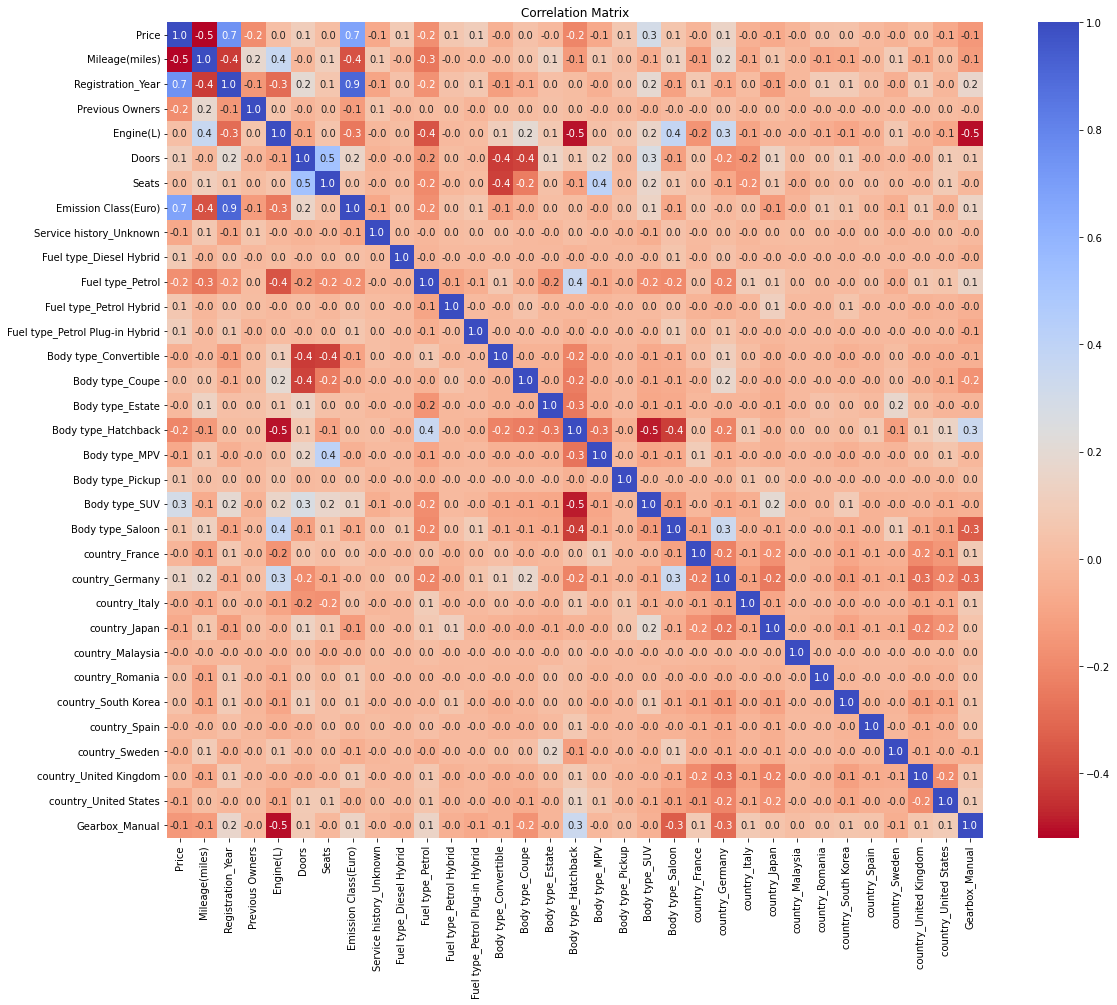

In [114]:
plt.figure(figsize=(20, 15))
sns.heatmap(ss_corr, annot=True, cmap='coolwarm_r', fmt='.1f', square=True)
plt.title('Correlation Matrix')
plt.show()

상관행렬

# 회고

분명히 배웠는데 생각나지 않아 다시 찾아본 코드들이 많았습니다.

상관행렬을 어떻게 써야될지 이번 실습을 통해 알게 되었습니다.